# Optics Lab 1: Albedo, Emissivity, Radiation and Temperature

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

blocksframe = pd.read_excel('lab1data.xlsx', sheetname='blockspart1')
flaskframe = pd.read_excel('lab1data.xlsx', sheetname='flaskpart2')
cansframe = pd.read_excel('lab1data.xlsx', sheetname='canspart3')
flirframe = pd.read_excel('lab1data.xlsx', sheetname='FLIRpart3')

### Part 1 Questions

#### 1.1 plot of temperature vs time for each block

In [129]:
blocksframe

,time,Twhite,Tblack,Rtstart,Rtend
0,0,22.5,23.1,22.5,22.5
1,1,23.2,25.2,NaN,NaN
2,2,24.8,27.6,NaN,NaN
3,3,26.0,30.0,NaN,NaN
4,4,27.2,31.8,NaN,NaN
5,5,28.5,33.8,NaN,NaN
6,6,29.7,35.7,NaN,NaN
7,7,30.9,37.4,NaN,NaN
8,8,32.0,39.2,NaN,NaN
9,9,33.1,40.8,NaN,NaN


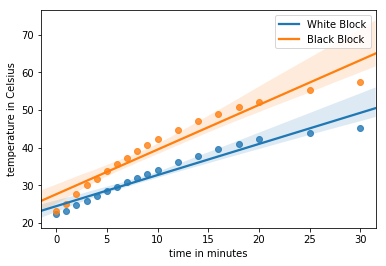

In [117]:
f, ax = plt.subplots(1, 1)
x_col='time in minutes'
y_col = 'temperature in Celsius'

sns.regplot(x='time',y='Twhite',data=blocksframe)
sns.regplot(x='time',y='Tblack',data=blocksframe)
ax.legend(handles=ax.lines, labels=["White Block","Black Block"])
ax.set(xlabel=x_col, ylabel=y_col)
plt.show()

#### 1.2 Net radiation equations for white and black blocks

In [118]:
blocksframe

,time,Twhite,Tblack,Rtstart,Rtend
0,0,22.5,23.1,22.5,22.5
1,1,23.2,25.2,NaN,NaN
2,2,24.8,27.6,NaN,NaN
3,3,26.0,30.0,NaN,NaN
4,4,27.2,31.8,NaN,NaN
5,5,28.5,33.8,NaN,NaN
6,6,29.7,35.7,NaN,NaN
7,7,30.9,37.4,NaN,NaN
8,8,32.0,39.2,NaN,NaN
9,9,33.1,40.8,NaN,NaN


In [139]:
white_albedo = .95
black_albedo = .04
sb_constant = 5.67032*10.0**-8 # Joules/Kelvin
incoming_radiation = 500 # watts Joules/second/meter squared (assumed that it is per meter squared)
whiteT = blocksframe['Twhite']  
blackT = blocksframe['Tblack']
baseline = 22.5 + 273.15 # Correction factor to account for starting temperature of environment
block_emissivity = .6 # assumes an emissivity value for ceramic and that black and white blocks same material

white_netradiation = (1-white_albedo)*incoming_radiation-block_emissivity*(sb_constant*(whiteT+273.15-baseline)**4)
black_netradiation = (1-black_albedo)*incoming_radiation-block_emissivity*(sb_constant*(blackT+273.15-baseline)**4)

In [141]:
black_netradiation #net radiation should be positive but inverseley related to temperature

0     480.000000
1     479.999998
2     479.999977
3     479.999892
4     479.999745
5     479.999445
6     479.998967
7     479.998323
8     479.997354
9     479.996184
10    479.994876
11    479.991586
12    479.987742
13    479.983222
14    479.978484
15    479.973528
16    479.960622
17    479.949527
Name: Tblack, dtype: float64

#### 1.3 
The black block experienced a higher rate of temperature increase because of it's lower albedo relative to the white block. Albedo is the ratio of incoming shortwave (UV and visible) light that is absorbed or transmitted. For opaque objects like the white and black blocks, what is not absorbed is reflected and lighter colors like white have a lower albedo, meaning the white block reflects more. The white block absorbes less shortwave radiation at each time step, such that it's net radiation is smaller than the black blocks until around 10-15 minutes, when exitance from the black block is high enough from an increased temperature such that it's change in net radiation between each time step starts to approach that of the white block. 

#### 1.4 
The temperatures of each block began to stabalize as seen from the plot, but at different temperatures. This is because the black block is absorbing more energy than the white block and releasing more energy as exitance. This causes it to reach a higher equilibrium than the white block. In this radiatively stable environment, with the lamp turned on, the blocks will not reach the same temperature since the white block will always reflect more shortwave than the black block and thus maintain a lower equilibrium. If the lamp were turned off, in the absence of any direct shortwave radiation, the blocks would emit radiation until they reach the same equilibrium temperature of the environment. 

#### 1.5
At the start of the experiment the blocks were the same temperature - 22.5 Celsius - as measured by the radiometer before the lamp was turned on and were about the same temperature as measured by the kinetic thermometer. At the end, the two blocks had a large difference in temperature as measured by the kinetic thermometer, 12.2 degrees. However, the radiometer indicated that the two blocks had very similar temperatures - 55.5 for the white block and 56.5 for the black block. One source of error in this measurement is that the lamp was turned off, but still hot and pointed at the blocks when the ending radiometer measurement was taken, possible causing each block to reflect significant amounts of infrared radiation at the radiometer as the measurement was taken.

We would expect the white block to have a lower temperature as measured by the radiometer since it is giving off less exitance because of it's lower kinetic temperature. We can infer from the fact that our kinetic temperature measurement and radiometer temperature measurement from the black block are so similar that the emissivity of the black block is near 1. At the end of our experiment, the blocks are near or at thermal equilibrium with their environment, so we can be safe in assuming that absorption = emissivity. Our results (assuming the radiometer reading for the white block should be lower) are consistent with Kirchhoff's law: that emissivity + reflectance + transmittance = 1 when emissivity=absorption at thermal equilibrium. Because the white block has a higher reflectance in the thernal infrared (because according to Dar, the radiometer measurement for the white block should have been in the 40s celsius), it will also have a lower emissivty and absorption at thermal equilibrium than the black block, leading to a lower equilibrium.


### Part 2 Questions

#### 2.1 Plot temperature vs time for two beakers

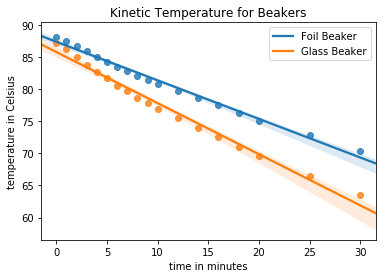

In [121]:
f, ax = plt.subplots(1, 1)
x_col='time in minutes'
y_col = 'temperature in Celsius'

sns.regplot(x='time',y='Tfoil_KT',data=flaskframe)
sns.regplot(x='time',y='Tglass_KT',data=flaskframe)
ax.legend(handles=ax.lines, labels=["Foil Beaker","Glass Beaker"])
ax.set(xlabel=x_col, ylabel=y_col)
ax.set_title("Kinetic Temperature for Beakers")
plt.show()

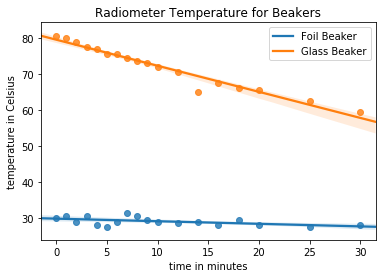

In [122]:
f, ax = plt.subplots(1, 1)
x_col='time in minutes'
y_col = 'temperature in Celsius'

sns.regplot(x='time',y='Tfoil_RT',data=flaskframe)
sns.regplot(x='time',y='Tglass_RT',data=flaskframe)
ax.legend(handles=ax.lines, labels=["Foil Beaker","Glass Beaker"])
ax.set(xlabel=x_col, ylabel=y_col)
ax.set_title("Radiometer Temperature for Beakers")
plt.show()

#### 2.2 Net radiation for each beaker

In [123]:
flaskframe

,time,Tfoil_KT,Tglass_KT,Tfoil_RT,Tglass_RT
0,0,88.2,87.2,30.0,80.5
1,1,87.5,86.3,30.5,80.0
2,2,86.7,85.0,29.0,79.0
3,3,86.0,83.7,30.5,77.5
4,4,85.1,82.7,28.0,77.0
5,5,84.3,81.8,27.5,75.5
6,6,83.4,80.5,29.0,75.5
7,7,82.9,79.8,31.5,74.5
8,8,82.1,78.7,30.5,73.5
9,9,81.5,77.8,29.5,73.0


In [124]:
foil_emissivity = .04
glass_emissivity = .95
sb_constant = 5.67032*10.0**-8 # Joules/Kelvin
incoming_radiation = 0 # watts Joules/second/meter squared (assumed that it is per meter squared)
foilT = flaskframe['Tfoil_KT']
glassT = flaskframe['Tglass_KT']
Tenv = # use temperature from the kestrel

foil_netradiation = foil_emissivity*(sb_constant*Tenv**4)-foil_emissivity*(sb_constant*(foilT+273.15)**4)
glass_netradiation = glass_emissivity*(sb_constant*Tenv**4)-glass_emissivity*(sb_constant*(glassT+273.15)**4)

In [125]:
glass_netradiation

0    -908.299927
1    -899.259689
2    -886.320911
3    -873.522263
4    -863.771866
5    -855.066508
6    -842.608476
7    -835.956962
8    -825.584243
9    -817.169523
10   -808.819293
11   -795.957450
12   -782.347776
13   -768.913381
14   -755.652754
15   -743.431618
16   -716.898464
17   -691.903694
Name: Tglass_KT, dtype: float64

The glass beaker cools much quicker than the foil beaker because of it's high emissivity relative to foil. The glass emits infrared at a much higher rate than the foil beaker, because glass as a material intrinsically absorbs and emits radiation at a higher rate than foil. This is why the kinetic temperature of glass starts to decrease faster than the beaker wrapped in foil; the foil wrapped around the beaker lowers the emissivity of the object as a whole, since infrared radiation in the foil beaker is poorly absorbed by the inner layer of the foil. The radiometer measures a stark difference between the foil beaker and the glass beaker, because glass is transparent in the infrared and foil is near opaque in the infrared. The radiometer measures the temperature of the inner glass beaker whereas it measures the temperature of the outer layer of the foil wrapped around the foil beaker.

#### 2.3 Solving for exitance measured by the radiometer # check explanation

The radiometer measurements show that foil is opaque in the infrared and glass is transparent in the infrared. The only variable in the two equations that differs is emissivity, and it is clear from the equations that exitance is directly proportional to emissivity. Therefore, the low emissivty value for foil of .04 translates to a very low exitance as measured by the radiometer. Converseley for glass, the high emissivity results in a high exitance.

In [126]:
foil_exitance = (foil_emissivity*(sb_constant*(foilT+273.15)**4))+(1-foil_emissivity)*sb_constant*T**4
glass_exitance = (glass_emissivity*(sb_constant*(glassT+273.15)**4))+(1-glass_emissivity)*sb_constant*T**4

### Part 3 Questions

#### 3.1 Photograph and Emissivity Ranking from High to Low

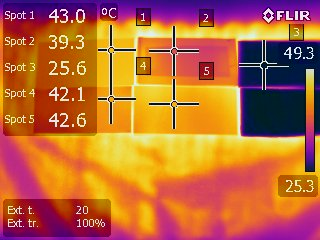

1) white painted steel and black painted steel
2) double pane glass and single pane glass
3) steel
4) foil

In [127]:
flirframe

,time,White Paint,Dbl Pane,Steel,Black Paint,Single Pane,Foil
0,13:22:00,23.8,23.6,23.8,24.1,23.8,23.7
1,13:38:00,37.1,29.0,25.1,37.1,33.3,25.1
2,13:48:00,41.8,35.8,25.4,40.6,40.3,25.3
3,13:58:00,42.4,39.4,25.4,41.0,42.1,25.3
4,14:08:00,40.9,39.9,25.8,40.0,41.6,25.4
5,14:22:00,30.9,33.7,24.9,30.7,32.7,24.8
6,14:32:00,29.2,30.7,24.7,29.0,29.8,24.5
7,14:42:00,28.1,28.8,24.9,28.0,28.4,24.9


The criteria I used was the radiant temperature as measured by the FLIR, and known information about the properties governing emissivity. I ranked white painted steel (WPS) and black painted steel (BPS) as having the same emissivity because steel has the same emissivity as steel and I assume that the emissivty of the black paint is the same as white paint in the thernal infrared (even though the reflectances differ in the shortwave). Similarly, I assume the same emissivities for double pane and single pane glass. Because steel had equal to or higher radiant temperature than foil for all measurements, and I know that these different materials likely have different emissivities, I infer that this is because steel has a higher emissivity than foil. Steel and foil have much lower temperatures compared to the other materials so I assume this is because they have lower rleative emissivities.

Double pane glass appears to have a lower radiant temperature than single pane glass, because there is more material in the double pane glass to conduct heat. This means that the double pane glass will be slower to emit radiation than the single pan glass once the heat source is turned on, as more of the absorbed thermal infrared (relative to the single pane glass) is conducted through the thicker double pane glass before it is emitted and measured by the FLIR. 

#### 3.2 General Equation for Exitance measured by FLIR

The equation below solves for the exitance of the source object as measured by the FLIR, correcting for reflected radiation from the environment around the object. In our experiments case, Tenv is the temperature of the environment as measured by the kestrel's air temperature sensorsource is the kinetic temperature of the source material and T. sb_constant is the Stefan-Boltzman constant and emissivity is the emissivity of a given source material. 1 -emissivity is the reflectance of that source material, assuming that the materials are optically thick to utilize Kirchhoff's Law, A = e = 1-R.

In [ ]:
Mflir = emissivity*sb_constant*Tsource**4 + (1-emissivity)*sb_constant*Tenv**4 #exitance of source corrected for reflected thermal
#### rearranged equation for Temperature of source
Tsource = ((Mflir - (1-emissivity)*sb_constant*Tenv**4)/(sb_constant*emissivity))**(1/4)

#### 3.3 Calculating kintetic temperature of the black sprayed steel

In [ ]:
Mflir = #???? need to use radiant temperature somehow, see lecture 5 and 4
emissivity = .9 # of the black painted steel
Tenv = 25.2 # as measured by environment


Tsource = ((Mflir + (1-emissivity)*sb_constant*Tenv**4)/(sb_constant*emissivity))**(1/4)

#### 3.4 Solve for emissivity

In [ ]:
# get black r ratio to solve for emissivity of block kinetic use shortcut Tk and Tr from Lecture 5

#### 3.5 a) default temp comparison (Graduate Student Question)

In [160]:
Tenv_true = 30 + 273.15
Tenv_default = 20 + 273.15
emissivity_default = .95
Mflir = 200 # picked a value to compare difference between Tsource clacluation with true environment temp and default

Tsource_true = ((Mflir - (1-emissivity_default)*sb_constant*Tenv_true**4)/(sb_constant*emissivity_default))**(1/4)
Tsource_default = ((Mflir - (1-emissivity_default)*sb_constant*Tenv_default**4)/(sb_constant*emissivity_default))**(1/4)

print("The difference between solved kinetic temperature with the true environmental temp and the default at 20 Celsius is:", 
      Tsource_true - Tsource_default, "degrees Kelvin")

Tenv_default = 10 + 273.15
Tsource_default = ((Mflir - (1-emissivity_default)*sb_constant*Tenv_default**4)/(sb_constant*emissivity_default))**(1/4)
print("The difference between solved kinetic temperature with the true environmental temp and the default at 10 Celsius is:", 
      Tsource_true - Tsource_default, "degrees Kelvin")

The difference between solved kinetic temperature with the true environmental temp and the default at 20 Celsius is: -1.014312519334652 degrees Kelvin
The difference between solved kinetic temperature with the true environmental temp and the default at 10 Celsius is: -1.9190553644409931 degrees Kelvin


Surface temperature is overestimated. If the default temperature was set even lower for the FLIR, then the difference would increase nonlinearly to 1.91 kelvin.

#### 3.5 b) emissivity comparison

In [161]:
Tenv_true = 20 + 273.15
emissivity_true = .9
emissivity_default = .95
Mflir = 200 # picked a value to compare difference between Tsource clacluation with true environment temp and default

Tsource_true = ((Mflir - (1-emissivity_true)*sb_constant*Tenv_true**4)/(sb_constant*emissivity_true))**(1/4)
Tsource_default = ((Mflir - (1-emissivity_default)*sb_constant*Tenv_true**4)/(sb_constant*emissivity_default))**(1/4)

print("The difference between solved kinetic temperature with the true emissivity and the default emissivity at 20 Celsius is:", 
      Tsource_true - Tsource_default, "degrees Kelvin")

The difference between solved kinetic temperature with the true emissivity and the default emissivity at 20 Celsius is: -4.182317584196795 degrees Kelvin


Surface temperature is underestimated.

#### 3.5 c) 

"Emissivity is by far the largest source of error" - Dar Roberts, Lab 1, 2018

3.6

In [167]:
cansframe['time'] = [0, 16, 26, 36, 46, 70, 80, 90]
cansframe

,time,Black Can RT,Silver Can RT,Black Can KT,Silver Can KT,Kestrel,Radiometer (Ceiling)
0,0,9.5,18.0,7.33,6.67,24.4,23.5
1,16,12.0,19.0,8.61,7.50,24.8,24.0
2,26,11.5,21.0,10.17,8.50,24.8,23.5
3,36,14.0,21.0,11.33,9.61,25.2,24.0
4,46,15.0,22.5,12.67,10.44,25.5,24.5
5,70,15.5,22.5,14.06,11.61,24.4,24.0
6,80,16.0,22.0,15.11,12.50,25.8,23.5
7,90,16.0,21.5,16.22,13.50,25.1,24.0


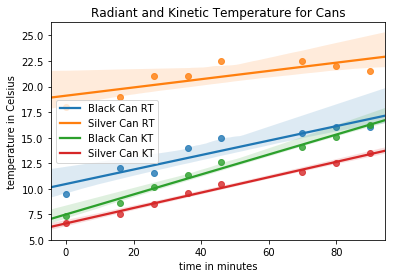

In [170]:
f, ax = plt.subplots(1, 1)
x_col='time in minutes'
y_col = 'temperature in Celsius'

sns.regplot(x='time',y='Black Can RT',data=cansframe)
sns.regplot(x='time',y='Silver Can RT',data=cansframe)
sns.regplot(x='time',y='Black Can KT',data=cansframe)
sns.regplot(x='time',y='Silver Can KT',data=cansframe)
ax.legend(handles=ax.lines, labels=["Black Can RT","Silver Can RT", 'Black Can KT','Silver Can KT'])
ax.set(xlabel=x_col, ylabel=y_col)
ax.set_title("Radiant and Kinetic Temperature for Cans")
plt.show()

Judging by the kinetic temperature measurements, the black can heated faster than the silver can. This is because the black paint on the can has a higher emissivity than the aluminum of the can. Since emissivity = absorption, assuming optical thickness, the black painted can absorbs thermal infrared from it's environment at a higher rate than the silver can. The silver can is made of aluminum foil only and has a lower emissivity than the black can.

However, the black can looked much colder to the FLIR, because of it's 